In [ ]:
!pip install highway-env
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 53.3 MB/s eta 0:00:00


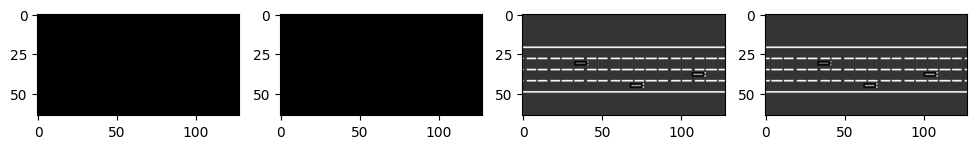

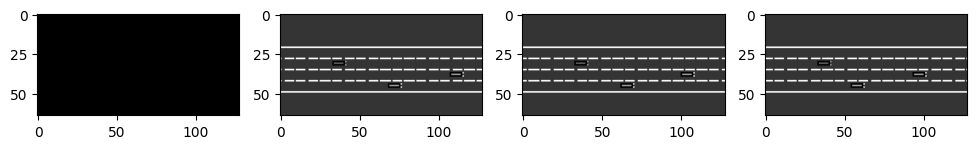

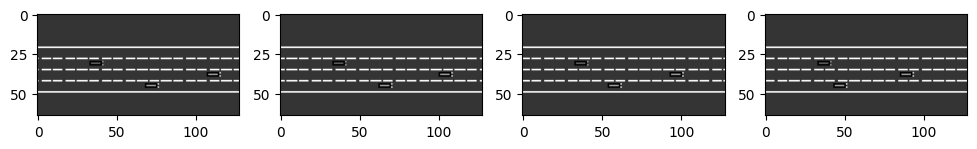

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
config = {
    "observation": {
        "type": "GrayscaleObservation",
        "observation_shape": (128, 64),
        "stack_size": 4,
        "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
        "scaling": 1.75,
    },
}
env = gym.make('highway-v0', config=config)
obs, info = env.reset()

# fig, axes = plt.subplots(ncols=4, figsize=(12, 5))

for _ in range(3):
    obs, reward, done, truncated, info = env.step(env.unwrapped.action_type.actions_indexes["IDLE"])

    fig, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
def train_env():
  env = gym.make(
          "highway-fast-v0",
          config={
              "observation": {
                  "type": "GrayscaleObservation",
                  "observation_shape": (128, 64),
                  "stack_size": 4,
                  "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
                  "scaling": 1.75,
              },
          },
      )
  env.reset()
  return env



In [ ]:
import gymnasium as gym
import highway_env
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



def keras_cnn(input_shape):

    model = keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        # Keras does softmax at end
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



# example use in tensorflow
env = train_env()
obs, info = env.reset()

input_shape = obs.shape
print("Input shape:", input_shape)
# tensorflow requires input (1,height, width, channels)
input_shape = (input_shape[1], input_shape[2], input_shape[0])
print(input_shape[1])
print("Reshaped input shape:", input_shape)
model = keras_cnn(input_shape)
print(model.summary())




Input shape: (4, 128, 64)
64
Reshaped input shape: (128, 64, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 62, 32)         │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 6, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,376,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,470,565 (5.61 MB)

 Trainable params: 1,470,565 (5.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# This is the following structure to be used

# After consideration lets not use tensorflow but you can test it keras sorta changes the padding secretly which is hard to write a report but its quite nice to use
num_episodes = 10
for episode in range(num_episodes):
    obs, info = env.reset()
    done = False
    while not done:
        obs_reshaped = obs.reshape(1,obs.shape[1], obs.shape[2], obs.shape[0]) # Reshape to (1, height, width, channels)
        action_probs = model.predict(obs_reshaped)
        action = np.argmax(action_probs)  # action with highest probability
        print(action)

        next_obs, reward, done, truncated, info = env.step(action)
        # apply the DQN here as is replay memory etc
        obs = next_obs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[7.8170333e-04 2.2771319e-05 9.6339005e-01 3.3965910e-07 3.5805069e-02]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.5361656e-11 9.8923845e-16 9.9999857e-01 7.2211999e-18 1.4222876e-06]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[6.0537849e-07 1.5957339e-12 9.9999940e-01 3.9279402e-20 1.3623476e-11]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[2.6697489e-05 1.5362130e-17 9.9997330e-01 5.5896643e-25 3.7236443e-19]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2.4015122e-07 7.4499117e-21 9.9999976e-01 3.6263994e-26 5.1241545e-20]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[2.0822649e-06 7.7619734e-18 9.9999797e-01 1.2457041e-24 2.1125634e-18]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.3027761e-05 8.7725184e-18 9.9998701e-01 4.4879401e-24 8.7763305e-19]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[4.7986578e-07 8.9570880e-19 9.9999952e-01 3.9488266e-26 3.4100678e-18]]
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[8.3985533e-06 6.2192526e-18 9.9999166e-01 2.7329

KeyboardInterrupt: 

In [ ]:
''' #this is for adding noise layer https://arxiv.org/pdf/1706.10295v3 hard man jesus
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F

class noise(nn.Module):
  def __init__(self, input_shape, num_actions):
    super(noise, self).__init__()
'''

In [ ]:
import gymnasium as gym
import highway_env
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F

class CNN(nn.Module):
  def __init__(self, input_shape, num_actions):
    super(CNN, self).__init__()
    #greyscale Image is(stack,height,width)
    stack, height, width = input_shape
    self.conv = nn.Sequential(
        # first Conv layer
        nn.Conv2d(stack,32,kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),

        # second Conv layer
        nn.Conv2d(32,64,kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),

        # optional
        '''
        nn.Conv2d(64,128, kernal_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
        '''
    )
    '''
    channel = 64
    uheight = height // 4
    uwidth = width // 4
    flattern_size = channel * uheight * uwidth
    '''

    # This is for finding the size to dense more robust compared to devision manually
    with torch.no_grad():
          # Torch uses(1,channels,height,width)
          test = torch.zeros(1, stack, height, width)
          find_conv_size = self.conv(test)
          conv_size = find_conv_size.numel()
    self.fc = nn.Linear(conv_size,num_actions)

  def forward(self,x):
    x = self.conv(x)
    x = torch.flatten(x, start_dim=1)
    # torch returns a
    x = self.fc(x)
    return x








## Read this when using

In [ ]:
#env Change
'''
def train_env():
  env = gym.make(
          "highway-fast-v0",
          config={
              "observation": {
                  "type": "GrayscaleObservation",
                  "observation_shape": (128, 64),
                  "stack_size": 4,
                  "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion keep this conversion this is in the highway env page
                  "scaling": 1.75,
              },
          },
      )
  env.reset()
  return env
'''

#MLP to CNN

# rather than state now it is the image which I call it input_shape in CNN

'''
    def initialize_neural_networks(self, env):
        # the lanes
        self.num_states = env.observation_space.shape[0]    Change to ->  #env.observation_space.shape
        # print(env.action_space.sample())
        self.num_actions = env.action_space.n

        self.q_net = DQNNetwork(self.num_states, self.num_states, self.num_actions)      Change to ->   #CNN(self.input_shape, self.num_actions)
        self.q_target_net = DQNNetwork(self.num_states, self.num_states, self.num_actions).        Change to ->   #CNN(self.input_shape, self.num_actions)
        self.q_target_net.load_state_dict(self.q_net.state_dict())
        self.update_target_network()
'''

# You would also need to change the state I was trying to understand but failed it probs in your get action